## An Introduction to Keras
In this notebook, I will provide a brief introduction to [Keras](https://keras.io/), a high-level neural networks python library; it is a wrapper ontop of either **Theano** or **Tensorflow**. 

In the first part, I will implement the simple perceptron model from the first homework. Then I will try the 'hello world' of neural net applications: hand-writing recognition from the [MNIST database](http://yann.lecun.com/exdb/mnist/). 

### MNIST Database
The MNIST database of handwritten digits. It consists of a training set of **60,000 examples**, and a test set of **10,000 examples**. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

*From [Yann Lecun's Website](http://yann.lecun.com/exdb/mnist/)*

First, let's import the necessary basic python libraries:

In [1]:
%matplotlib inline

# Standard Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks')

Next, we let's load the **MNIST dataset**. Fortunately for us, this is already available in the **Keras** module (as well as many other common datasets). So we will import from **Keras** as follows:

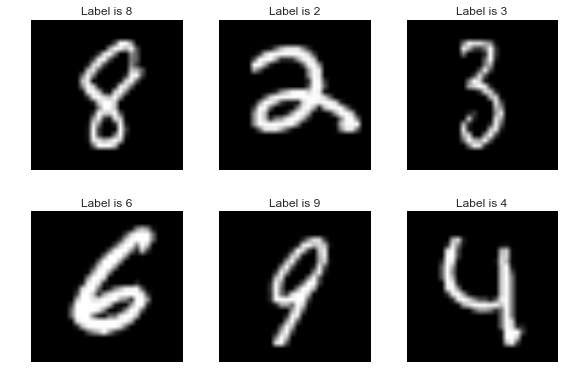

In [3]:
# Load Dataset from Keras Libraries
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()
nb_class = 10

# Visualize Some Examples
idx = np.random.choice(X_train.shape[0],6,replace=False)
for i,ix in enumerate(idx):
    plt.subplot(231+i)
    plt.title('Label is {0}'.format(y_train[ix]))
    plt.imshow(X_train[ix], cmap='gray')
    plt.axis('off')

plt.tight_layout()

# Reshape X data from 2D to 1D (28x28 to 784)
X_train = X_train.reshape(60000,784).astype('float32')
X_test  = X_test.reshape(10000,784).astype('float32')

# Convert Y labels to Categorical One-Hot Format
y_train = np_utils.to_categorical(y_train, nb_class)
y_test = np_utils.to_categorical(y_test, nb_class)

### Neural Network Model
Now, we are goint to create our neural network model using Keras' high-level library. The big advantage of Keras is that it abstracts away the low level code of the basic elements of neural networks such as hidden units, layers, activations, optimizers, etc. In other words, you just call Keras functions to create these things for you, without hand coding the details yourself. Underneath it all, Keras is using **Tensorflow** or **Theano**, just like you would yourself.

To demonstrate this, let's first decide on a network architecture for our MNIST dataset. Let's use the same architecture as in the `multilayer_perceptron.py` example we used in class to test our **Tensorflow** installation. Here is the network architecture:

#### Network Architecture
![Network Architecture](NetArch1.png)

Now let's proceed to build this in Keras.

In [4]:
# Import Keras Libraries
from keras.models import Sequential
from keras.layers import Dense, Activation


# Define Model Parameters
nb_feat   = 28    # no. of features/columns of input
L1_units  = 256   # no. of nodes in Layer 1
L2_units  = 100   # no. of nodes in Layer 2
L3_units  = 50   # no. of nodes in Layer 2
nb_class  = 10    # no. of output classes

# Neural Network Model
model = Sequential()                             # Sequential network model description
model.add(Dense(L1_units,input_shape=(784,)))    # Add 1st Dense Layer
model.add(Activation("relu"))                    # Add activation function

model.add(Dense(L2_units))                       # Add 2nd Dense Layer
model.add(Activation("relu"))                    # Add activation function

model.add(Dense(L3_units))                       # Add 3nd Dense Layer
model.add(Activation("relu"))                    # Add activation function

model.add(Dense(nb_class))                       # Add 3rd Dense Layer, also the classification layer
model.add(Activation('softmax'))                 # Add sigmoid classification 

Using TensorFlow backend.


Once you've described the model in a sequential model, you then proceed to compile the model. The model needs to be compiled because the actual Theano/Tensorflow backend uses C/C++ internally for faster implementations and runs. 

Also, while compiling, we defining the loss function (optimization criterion) and the kind of optimizer to use. Here I use the popular **RMSprop**, an adaptive variant of gradient descent.

In [5]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

Finally, I proceed to train the model with a simple one line command:

In [6]:
log = model.fit(X_train, y_train,nb_epoch=30, batch_size=32, verbose=2,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
12s - loss: 9.8638 - acc: 0.3864 - val_loss: 8.7378 - val_acc: 0.4571
Epoch 2/30
12s - loss: 8.7325 - acc: 0.4574 - val_loss: 8.5636 - val_acc: 0.4682
Epoch 3/30
12s - loss: 8.5586 - acc: 0.4686 - val_loss: 8.5682 - val_acc: 0.4681
Epoch 4/30
12s - loss: 8.5785 - acc: 0.4674 - val_loss: 8.4555 - val_acc: 0.4751
Epoch 5/30
15s - loss: 8.5295 - acc: 0.4704 - val_loss: 8.4599 - val_acc: 0.4746
Epoch 6/30
15s - loss: 8.4660 - acc: 0.4744 - val_loss: 8.7201 - val_acc: 0.4586
Epoch 7/30
12s - loss: 8.4377 - acc: 0.4763 - val_loss: 8.4889 - val_acc: 0.4730
Epoch 8/30
13s - loss: 8.4451 - acc: 0.4758 - val_loss: 8.4055 - val_acc: 0.4783
Epoch 9/30
12s - loss: 8.4453 - acc: 0.4759 - val_loss: 8.4317 - val_acc: 0.4767
Epoch 10/30
12s - loss: 8.4305 - acc: 0.4768 - val_loss: 8.4400 - val_acc: 0.4761
Epoch 11/30
12s - loss: 8.4669 - acc: 0.4745 - val_loss: 8.5217 - val_acc: 0.4712
Epoch 12/30
18s - loss: 8.4461 - acc: 0.4758 - val_loss: 

In [ ]:
# Scikit-Learn Machine Learning Utilities
from sklearn.metrics import confusion_matrix

## Final Accuracy
score = model.evaluate(X_test, y_test)
print'Model Accuracy: {}%'.format(score[1]*100)
print ''
print ''

y_pred = model.predict_classes(X_test)
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)  ## Confusion matrix
plot_confusion_matrix(cm, ['0','1','2','3','4','5','6','7','8','9'],normalize=True)

In [ ]:
# summarize history for accuracy
plt.plot(log.history['acc'])
plt.plot(log.history['val_acc'])
plt.title('Model Accuracy'), plt.ylabel('Accuracy'), plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [ ]:
# summarize history for loss
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('Model Loss'), plt.ylabel('Loss'), plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [2]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')